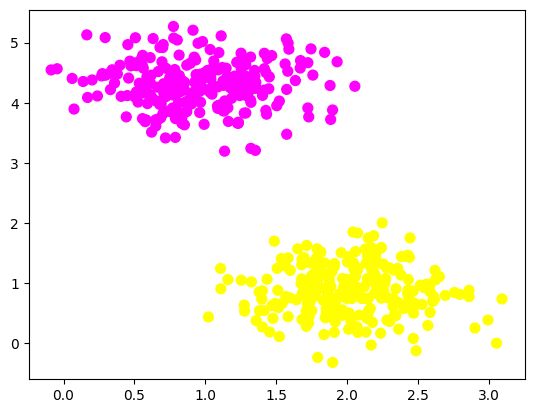

In [ ]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
				random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()


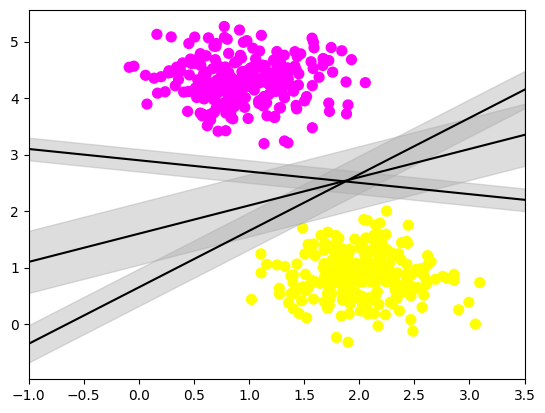

In [ ]:
# creating linspace between -1 to 3.5
xfit = np.linspace(-1, 3.5)

# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
	yfit = m * xfit + b
	plt.plot(xfit, yfit, '-k')
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
	color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()


# New section

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving 3-dataset.csv to 3-dataset.csv


In [ ]:
import pandas as pd
import math
import numpy as np

data = pd.read_csv("3-dataset.csv")
features = [feat for feat in data]
features.remove("answer")

In [ ]:
class Node:
    def __init__(self):
        self.children = []
        self.value = ""
        self.isLeaf = False
        self.pred = ""

In [ ]:
def entropy(examples):
    pos = 0.0
    neg = 0.0
    for _, row in examples.iterrows():
        if row["answer"] == "yes":
            pos += 1
        else:
            neg += 1
    if pos == 0.0 or neg == 0.0:
        return 0.0
    else:
        p = pos / (pos + neg)
        n = neg / (pos + neg)
        return -(p * math.log(p, 2) + n * math.log(n, 2))

In [ ]:
def info_gain(examples, attr):
    uniq = np.unique(examples[attr])
    #print ("\n",uniq)
    gain = entropy(examples)
    #print ("\n",gain)
    for u in uniq:
        subdata = examples[examples[attr] == u]
        #print ("\n",subdata)
        sub_e = entropy(subdata)
        gain -= (float(len(subdata)) / float(len(examples))) * sub_e
        #print ("\n",gain)
    return gain

In [ ]:
def ID3(examples, attrs):
    root = Node()

    max_gain = 0
    max_feat = ""
    for feature in attrs:
        #print ("\n",examples)
        gain = info_gain(examples, feature)
        if gain > max_gain:
            max_gain = gain
            max_feat = feature
    root.value = max_feat
    #print ("\nMax feature attr",max_feat)
    uniq = np.unique(examples[max_feat])
    #print ("\n",uniq)
    for u in uniq:
        #print ("\n",u)
        subdata = examples[examples[max_feat] == u]
        #print ("\n",subdata)
        if entropy(subdata) == 0.0:
            newNode = Node()
            newNode.isLeaf = True
            newNode.value = u
            newNode.pred = np.unique(subdata["answer"])
            root.children.append(newNode)
        else:
            dummyNode = Node()
            dummyNode.value = u
            new_attrs = attrs.copy()
            new_attrs.remove(max_feat)
            child = ID3(subdata, new_attrs)
            dummyNode.children.append(child)
            root.children.append(dummyNode)

    return root

In [ ]:
def printTree(root: Node, depth=0):
    for i in range(depth):
        print("\t", end="")
    print(root.value, end="")
    if root.isLeaf:
        print(" -> ", root.pred)
    print()
    for child in root.children:
        printTree(child, depth + 1)

In [ ]:
def classify(root: Node, new):
    for child in root.children:
        if child.value == new[root.value]:
            if child.isLeaf:
                print ("Predicted Label for new example", new," is:", child.pred)
                exit
            else:
                classify (child.children[0], new)

In [ ]:
root = ID3(data, features)
print("Decision Tree is:")
printTree(root)
print ("------------------")

new = {"outlook":"sunny", "temperature":"hot", "humidity":"normal", "wind":"strong"}
classify (root, new)

Decision Tree is:
outlook
	overcast ->  ['yes']

	rain
		wind
			strong ->  ['no']

			weak ->  ['yes']

	sunny
		humidity
			high ->  ['no']

			normal ->  ['yes']

------------------
Predicted Label for new example {'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'normal', 'wind': 'strong'}  is: ['yes']


Accuracy: 0.90


<ipython-input-22-f8ec59a753c7>:35: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')


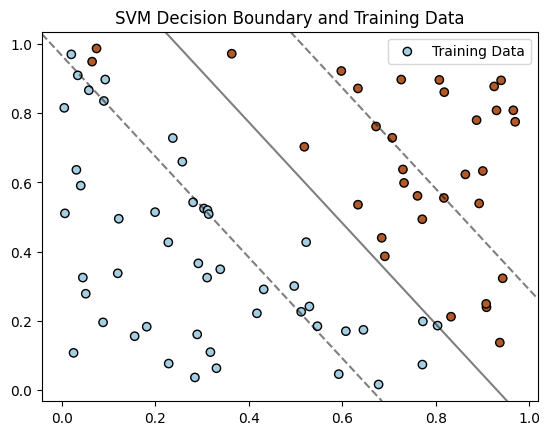

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a random dataset
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundary and training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label='Training Data')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], label='Decision Boundary')

plt.title('SVM Decision Boundary and Training Data')
plt.legend()
plt.show()


[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]
[0]


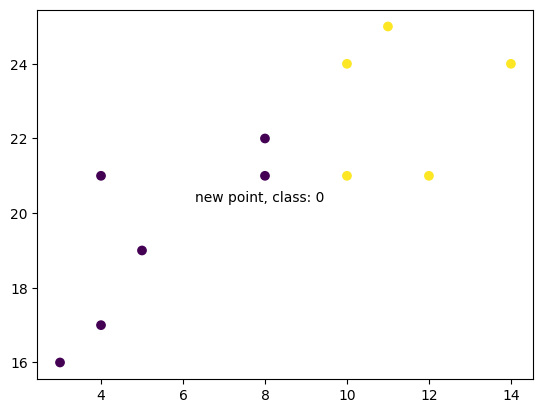

[1]


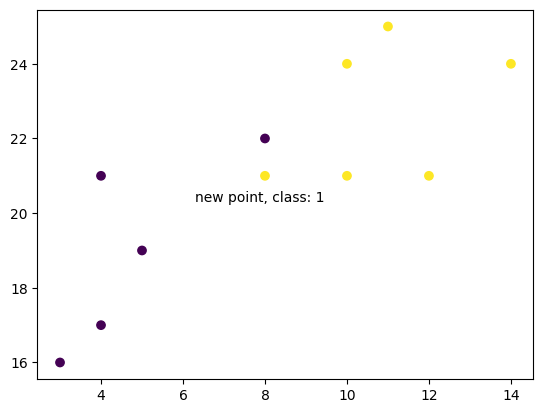

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
data = list(zip(x, y))
print(data)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()